In [2]:
# -*- coding: utf-8 -*-
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
from matplotlib.ticker import MultipleLocator 

%matplotlib inline

In [3]:
path = os.getcwd().split('TianChi_IJCAI-17_footfall_prediction_code')[0]

#shop_info = pd.read_table(path+'dataset/shop_info.txt',names=['shop_id','city_name','location_id','per_pay','score','comment_cnt','shop_level','cate_1_name','cate_2_name','cate_3_name'],header=None,delimiter=',',encoding='utf8',delim_whitespace=False,index_col=False)
shop_info = pd.read_table(path+'dataset/shop info with count.csv',delimiter=',',encoding='utf8',delim_whitespace=False,index_col=False)

shop_info.index = shop_info['shop_id'].tolist()

In [4]:
shop_info.head()

,shop_id,city_name,location_id,per_pay,score,comment_cnt,shop_level,cate_1_name,cate_2_name,cate_3_name,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
1,1,湖州,885,8,4.0,12.0,2,美食,休闲茶饮,饮品/甜点,...,202,243,216,255,172,226,257,251,281,180
2,2,哈尔滨,64,19,NaN,NaN,1,超市便利店,超市,NaN,...,155,143,78,82,97,83,96,96,115,80
3,3,南昌,774,5,3.0,2.0,0,美食,休闲茶饮,奶茶,...,127,125,47,80,61,68,103,102,104,67
4,4,天津,380,18,NaN,NaN,1,超市便利店,超市,NaN,...,211,221,81,90,104,55,110,215,196,115
5,5,杭州,263,2,2.0,2.0,0,美食,休闲食品,生鲜水果,...,161,240,454,302,1,0,215,203,291,239


In [7]:
shop_info.describe()

/Users/wakemeup/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,shop_id,location_id,per_pay,score,comment_cnt,shop_level,2015-07-01,2015-07-02,2015-07-03,2015-07-04,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
count,2000.000000,2000.000000,2000.000000,1709.000000,1709.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,583.083000,10.479000,2.677004,3.130486,0.814500,0.360500,0.788500,1.042000,1.057500,...,153.428000,164.777500,138.884000,137.993000,132.673000,139.027500,150.398500,160.960000,158.536500,135.374000
std,577.494589,335.763357,5.762479,1.024211,3.499072,0.855836,3.652288,6.048393,8.154906,8.261496,...,174.548874,196.255033,138.370961,140.894274,129.347116,139.395011,145.420557,180.559462,184.322609,135.053737
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,500.750000,287.750000,5.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,75.000000,78.000000,66.000000,67.000000,62.000000,68.000000,75.000000,79.000000,77.000000,65.000000
50%,1000.500000,577.500000,10.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,...,110.000000,116.000000,100.000000,100.500000,97.000000,100.000000,110.000000,117.000000,112.500000,99.000000
75%,1500.250000,877.250000,15.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,...,171.000000,182.000000,160.000000,158.000000,151.000000,158.000000,173.000000,183.000000,177.000000,156.000000
max,2000.000000,1159.000000,20.000000,4.000000,20.000000,2.000000,85.000000,89.000000,154.000000,154.000000,...,3560.000000,3944.000000,2062.000000,2577.000000,1912.000000,1978.000000,2078.000000,3687.000000,3841.000000,1973.000000


In [10]:
shop_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 499 entries, shop_id to 2016-10-31
dtypes: float64(2), int64(493), object(4)
memory usage: 7.6+ MB


In [45]:
pd.to_datetime('2015-07-01').date().strftime("%Y-%m-%d")

'2015-07-01'

In [55]:
pd.to_datetime('2015-07-01').strftime("%Y-%m-%d")

'2015-07-01'

In [320]:
pd.to_datetime('2015-07-01').date()

datetime.date

In [9]:
def dateRange(start, end):
    days = (datetime.datetime.strptime(end, "%Y-%m-%d") - datetime.datetime.strptime(start, "%Y-%m-%d")).days + 1
    return [datetime.datetime.strftime(datetime.datetime.strptime(start, "%Y-%m-%d") + datetime.timedelta(i), "%Y-%m-%d") for i in xrange(days)]
#len(dateRange('2015-07-01','2016-10-31'))

### 绘图 draw_id(id,start_date='2015-07-01',end_date='2016-10-31',by_week=False,figsize=(16,9))

In [56]:
def draw_id(id,start_date='2015-07-01',end_date='2016-10-31',by_week=False,figsize=(16,9)):
    if by_week:
        xmajorLocator = MultipleLocator(7) #将x轴次刻度标签设置为7的倍数
        ax = plt.subplot(111) 
        ax.xaxis.set_major_locator(xmajorLocator)
    shop_info.loc[id,start_date:end_date].plot(legend=True,figsize=figsize)
    

In [232]:
i=8

In [11]:

for id in range(i*10,(i+1)*10):   
    draw_id(id)
print i 
i+=1

NameError: name 'i' is not defined

### 绘图 draw_ids(ids,start_date='2015-07-01',end_date='2016-10-31',by_week=False,figsize=(16,9))

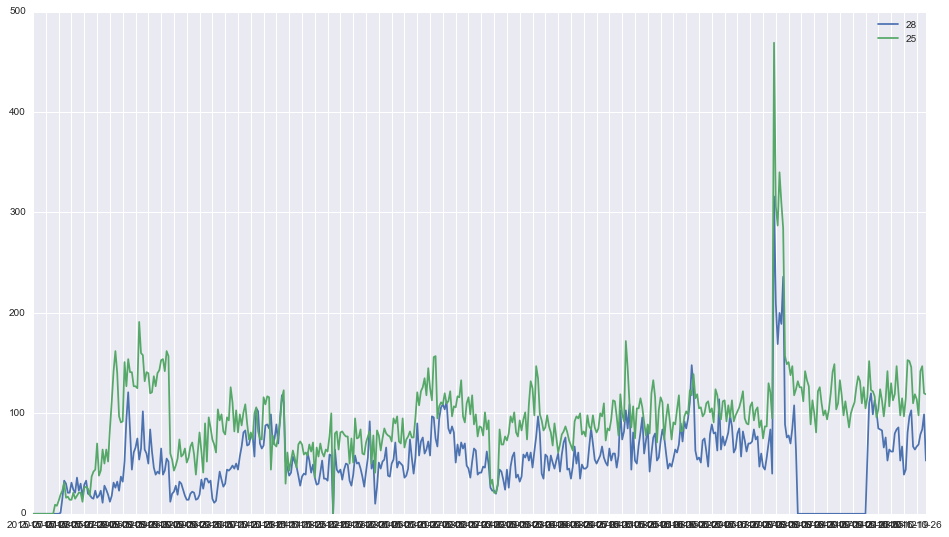

In [9]:
def draw_ids(ids,start_date='2015-07-01',end_date='2016-10-31',by_week=False,figsize=(16,9)):
    """
    fig = plt.figure(figsize=(16,9))
    ax = pl.gca()  
    for id in ids:
        plt.plot(shop_info.loc[id,start_date:end_date].tolist(),label = str(id))
    plt.xlabel('day')
    plt.ylabel('count')
    plt.title('count each day')
    plt.grid()
    plt.legend()
    """
    if by_week:
        xmajorLocator = MultipleLocator(7) #将x轴次刻度标签设置为7的倍数
        ax = plt.subplot(111) 
        ax.xaxis.set_major_locator(xmajorLocator)
        shop_info.loc[ids,start_date:end_date].T.plot(figsize=figsize,ax=ax)
    else :  shop_info.loc[ids,start_date:end_date].T.plot(figsize=figsize)
    
    
draw_ids([28,25],by_week=True)

In [ ]:
draw_ids_avg(ids,start_date='2015-07-01',end_date='2016-10-31')

### def draw_ids_avg(ids,start_date='2015-07-01',end_date='2016-10-31',by_week=True,figsize=(70,10)):

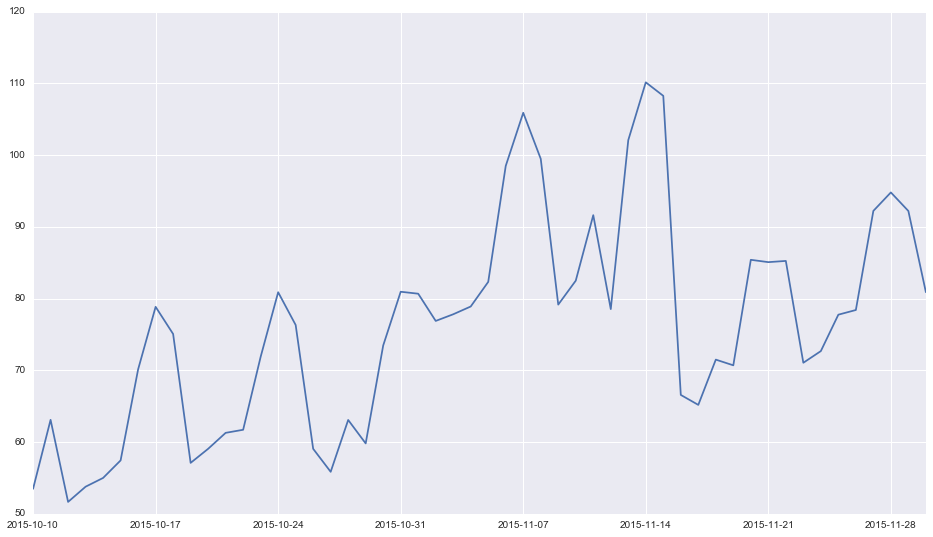

In [75]:
def draw_ids_avg(ids,start_date='2015-07-01',end_date='2016-10-31',by_week=True,figsize=(70,10)):
    if by_week:
        xmajorLocator   = MultipleLocator(7) #将x轴次刻度标签设置为5的倍数
        ax = plt.subplot(111) 
        ax.xaxis.set_major_locator(xmajorLocator)
    #shop_info.loc[ids,start_date:end_date].mean(axis=0).plot(figsize=(70,10),xlim=())
    shop_info.loc[ids,start_date:end_date].mean(axis=0).plot(figsize=figsize)




<class 'matplotlib.axes._subplots.AxesSubplot'>


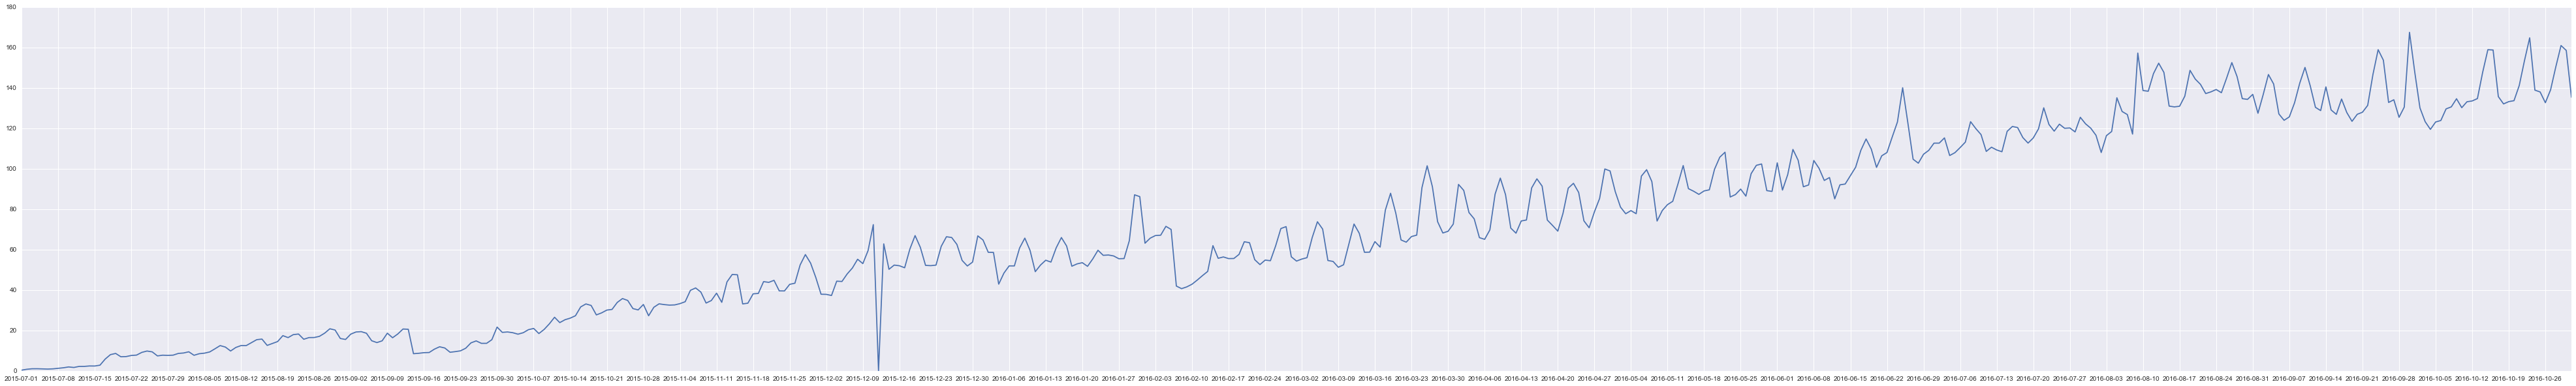

In [298]:
draw_ids_avg(range(1,2001))
plt.savefig('avg the whole time.jpg')


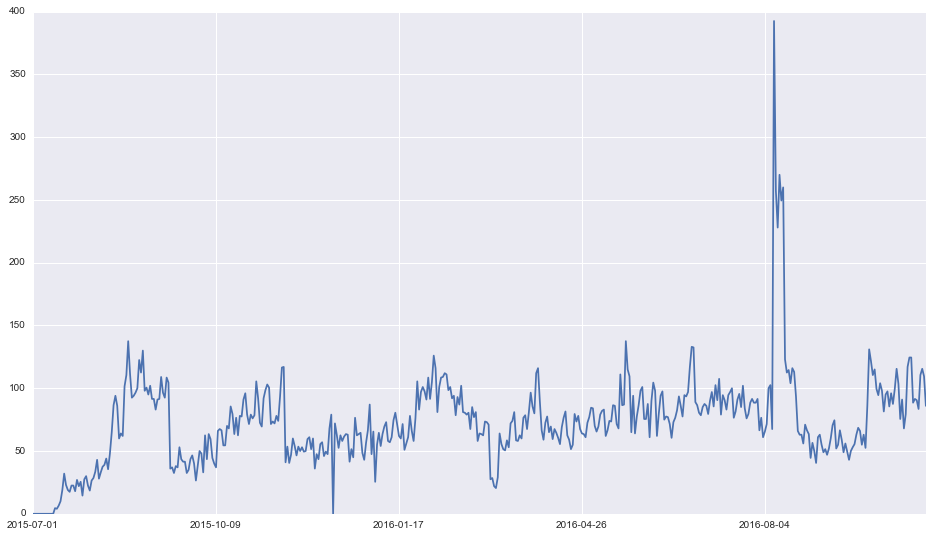

In [311]:
draw_ids_avg([28,25],by_week=False,figsize=(16,9))

### draw_ids_diff(ids,start_date='2015-07-01',end_date='2016-10-31',by_week=False,figsize=(16,9)):  

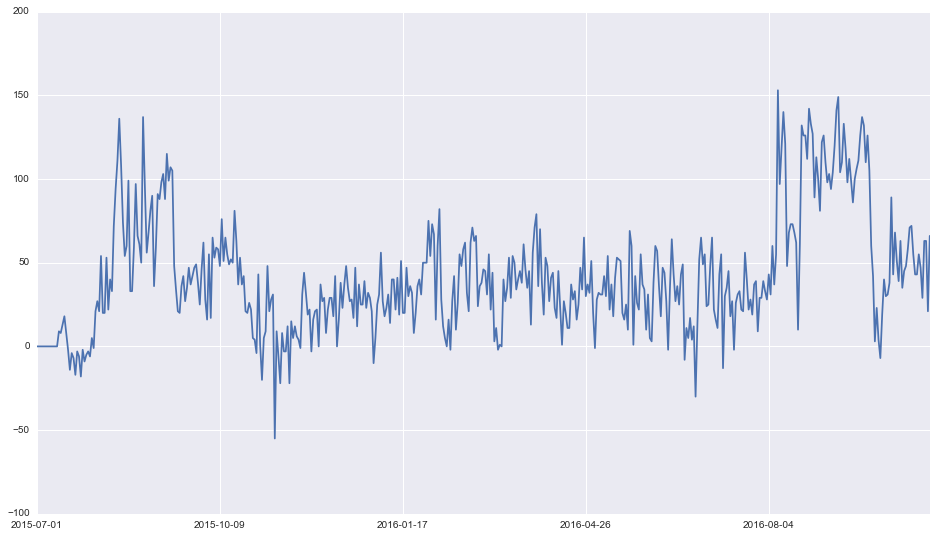

In [318]:

def draw_ids_diff(ids,start_date='2015-07-01',end_date='2016-10-31',by_week=False,figsize=(16,9)):  
    if by_week:
        xmajorLocator   = MultipleLocator(7) #将x轴次刻度标签设置为5的倍数
        ax = plt.subplot(111) 
        ax.xaxis.set_major_locator(xmajorLocator)
    (shop_info.loc[ids[0],start_date:end_date]-shop_info.loc[ids[1],start_date:end_date]).plot(figsize=figsize)
   
#draw_ids_diff([25,28])

In [235]:
shop_info.loc[86]

shop_id                 86
city_name               成都
location_id            910
per_pay                 19
score                    3
comment_cnt              0
shop_level               1
cate_1_name          超市便利店
cate_2_name             超市
cate_3_name            NaN
2015-07-01               0
2015-07-02               0
2015-07-03               0
2015-07-04               0
2015-07-05               0
2015-07-06               0
2015-07-07               0
2015-07-08               0
2015-07-09               0
2015-07-10               0
2015-07-11               0
2015-07-12               0
2015-07-13               0
2015-07-14               0
2015-07-15               0
2015-07-16               0
2015-07-17               0
2015-07-18               0
2015-07-19               0
2015-07-20               0
                    ...   
2016-10-17             121
2016-10-18             123
2016-10-19             111
2016-10-20             117
2016-10-21             137
2016-10-22             156
2

In [234]:
shop_info.loc[[86],'2016-08-05':'2016-08-20']

,2016-08-05,2016-08-06,2016-08-07,2016-08-08,2016-08-09,2016-08-10,2016-08-11,2016-08-12,2016-08-13,2016-08-14,2016-08-15,2016-08-16,2016-08-17,2016-08-18,2016-08-19,2016-08-20
86,69,47,52,103,98,12,7,7,30,127,112,135,123,105,140,170


In [72]:
draw_ids([86],'2016-08-05','2016-08-20')

NameError: name 'draw_ids' is not defined

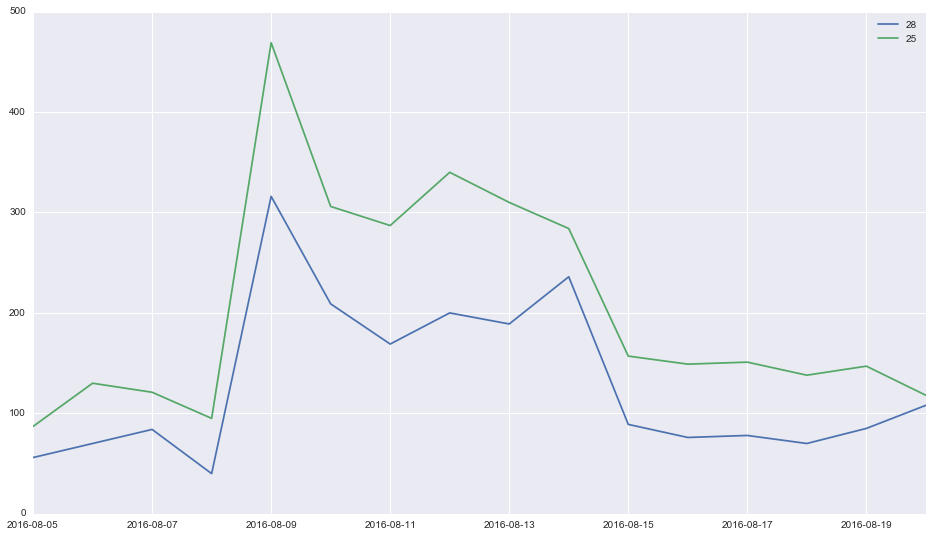

In [265]:
draw_ids([28,25],'2016-08-05','2016-08-20')

In [217]:
shop_info['cate_2_name'].value_counts()

快餐             639
超市             372
便利店            206
休闲茶饮           177
小吃             156
休闲食品           150
烘焙糕点           122
中餐              78
其他美食            44
火锅              33
烧烤               9
汤/粥/煲/砂锅/炖菜      7
药店               2
网吧网咖             2
美容美发             1
本地购物             1
个人护理             1
Name: cate_2_name, dtype: int64

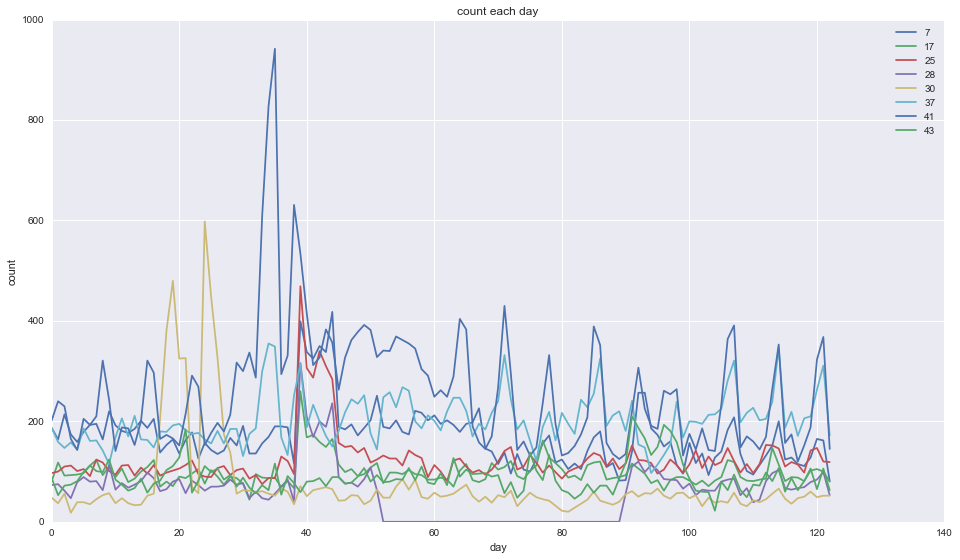

In [120]:
ids = shop_info[shop_info['cate_3_name']=='西式快餐'].index.tolist()
draw_ids(ids[:8])

### draw_week_id(id,start_date='2015-07-01',end_date='2016-10-31',figsieze=(16,9))
### week (0~68)

In [10]:

#  占个格子 &&  cal avg sales count each day
total_day = pd.to_datetime('2016-11-01').date()-pd.to_datetime('2015-07-01').date() 
total_day = total_day.days
total_week = total_day / 7
start_day = pd.to_datetime('2016-11-01').date() - datetime.timedelta(total_week*7)
#print start_day
for week_number in range(total_week): # 0~68
    start_day_of_week = start_day +  datetime.timedelta(week_number*7) 
    end_day_of_week = start_day_of_week + datetime.timedelta(6)
    start_day_of_week =   start_day_of_week.strftime("%Y-%m-%d")
    end_day_of_week = end_day_of_week.strftime("%Y-%m-%d")
    print start_day_of_week,end_day_of_week
    shop_info['wk_'+str(week_number)] = shop_info.loc[:,start_day_of_week:end_day_of_week].mean(axis=1)


2015-07-07 2015-07-13
2015-07-14 2015-07-20
2015-07-21 2015-07-27
2015-07-28 2015-08-03
2015-08-04 2015-08-10
2015-08-11 2015-08-17
2015-08-18 2015-08-24
2015-08-25 2015-08-31
2015-09-01 2015-09-07
2015-09-08 2015-09-14
2015-09-15 2015-09-21
2015-09-22 2015-09-28
2015-09-29 2015-10-05
2015-10-06 2015-10-12
2015-10-13 2015-10-19
2015-10-20 2015-10-26
2015-10-27 2015-11-02
2015-11-03 2015-11-09
2015-11-10 2015-11-16
2015-11-17 2015-11-23
2015-11-24 2015-11-30
2015-12-01 2015-12-07
2015-12-08 2015-12-14
2015-12-15 2015-12-21
2015-12-22 2015-12-28
2015-12-29 2016-01-04
2016-01-05 2016-01-11
2016-01-12 2016-01-18
2016-01-19 2016-01-25
2016-01-26 2016-02-01
2016-02-02 2016-02-08
2016-02-09 2016-02-15
2016-02-16 2016-02-22
2016-02-23 2016-02-29
2016-03-01 2016-03-07
2016-03-08 2016-03-14
2016-03-15 2016-03-21
2016-03-22 2016-03-28
2016-03-29 2016-04-04
2016-04-05 2016-04-11
2016-04-12 2016-04-18
2016-04-19 2016-04-25
2016-04-26 2016-05-02
2016-05-03 2016-05-09
2016-05-10 2016-05-16
2016-05-17

In [51]:
def draw_week_id(id,start_date='2015-07-01',end_date='2016-10-31',figsieze=(16,9)):
    shop_info.loc[id,'wk_0':'wk_68'].T.plot(figsize=(16,9))


### draw_week_id(id,start_date='2015-07-01',end_date='2016-10-31',figsieze=(16,9))

In [66]:
def draw_week_ids(ids,start_date='2015-07-01',end_date='2016-10-31',figsieze=(16,9)):
    shop_info.loc[ids,'wk_0':'wk_68'].T.plot(figsize=(16,9))

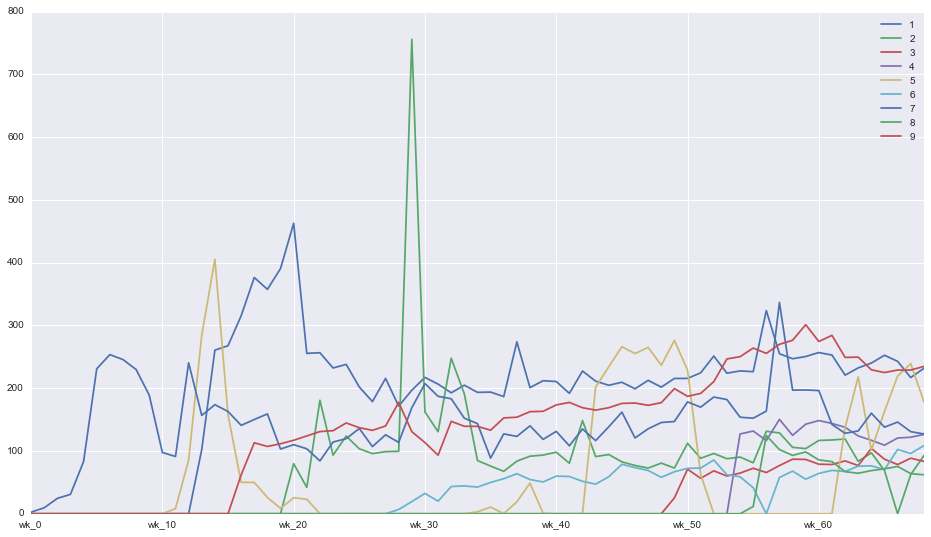

In [71]:
draw_week_ids(range(1,10))

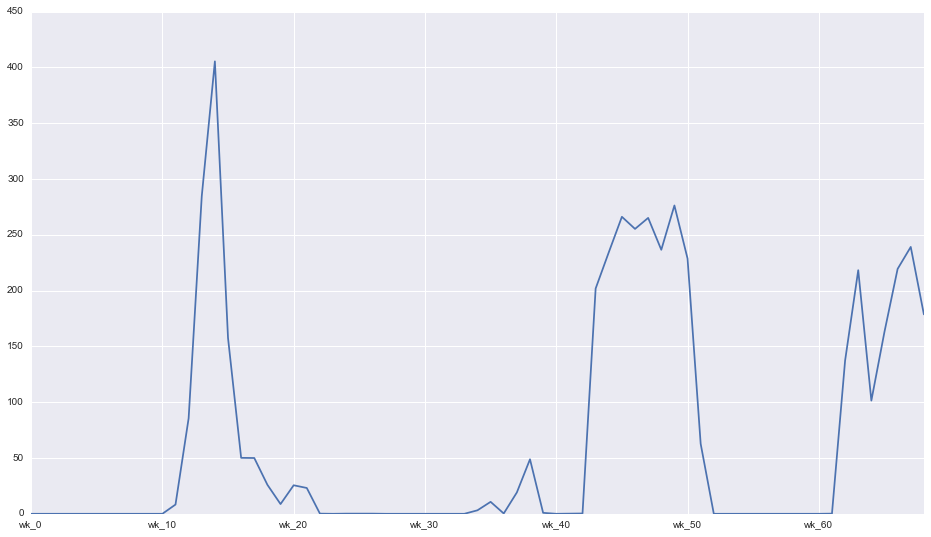

In [63]:
draw_week_id(5)

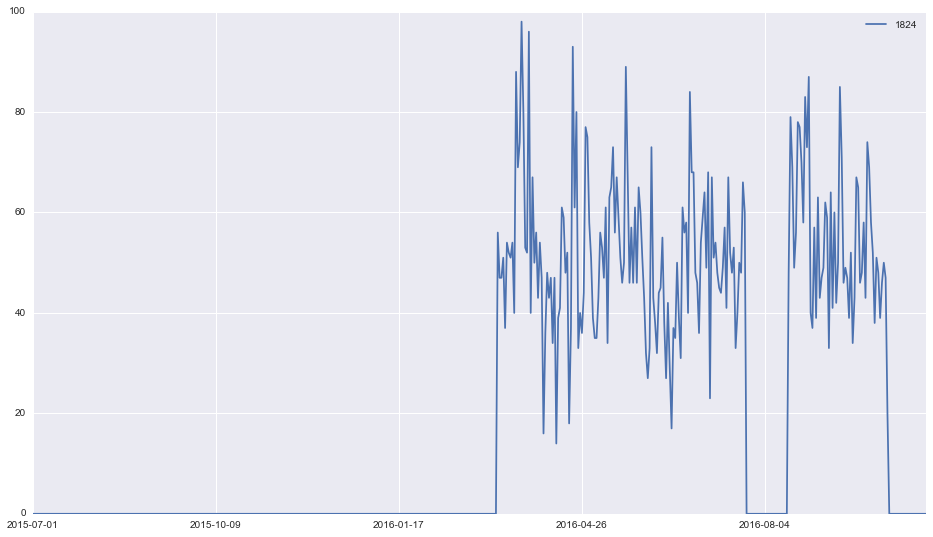

In [95]:
draw_id(1824)

shop_id              1
city_name           湖州
location_id        885
per_pay              8
score                4
comment_cnt         12
shop_level           2
cate_1_name         美食
cate_2_name       休闲茶饮
cate_3_name      饮品/甜点
2015-07-01           0
2015-07-02           0
2015-07-03           0
2015-07-04           0
2015-07-05           0
2015-07-06           0
2015-07-07           0
2015-07-08           0
2015-07-09           0
2015-07-10           0
2015-07-11           0
2015-07-12           0
2015-07-13           0
2015-07-14           0
2015-07-15           0
2015-07-16           0
2015-07-17           0
2015-07-18           0
2015-07-19           0
2015-07-20           0
                ...   
wk_39              212
wk_40          210.714
wk_41          191.857
wk_42          227.429
wk_43          211.286
wk_44          204.714
wk_45          209.571
wk_46          199.143
wk_47          212.571
wk_48          201.857
wk_49          215.571
wk_50          215.714
wk_51      